#### FIRST PROJECT
- Student: Emilia Maul 
- Variant: 1 
- Taking course since: 2022-11-21

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
%matplotlib inline

## 1. Чтение файлов и разведочный анализ

#### Данные о покупателях

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Просмотр типов данных для принятия решения о их сохранении и проверка наличия пустых значений
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


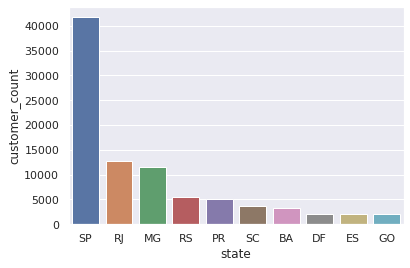

In [4]:
# Просмотр топ 10 стран по количеству покупателей
top_states = customers.customer_state.value_counts().to_frame() \
                      .reset_index().head(10) \
                      .rename(columns={'index':'state', 'customer_state':'customer_count'})
sns.barplot(data=top_states, x='state', y='customer_count')

#### Данные о составах заказов

In [5]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Просмотр типов данных для принятия решения о преобразовании типов
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [7]:
# Смена типа данных для колонки shipping_limit_date
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date, dayfirst=True)

In [8]:
# Проверка наличия пустых значений
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Данные о заказах

In [9]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Просмотр типов данных для принятия решения о преобразовании типов
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [11]:
# Создание списка столбцов, тип данных которых необходимо перевести в дату
columns_to_date = orders.columns[-5:].to_list()
columns_to_date

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [12]:
# Преобразование типа данных в дату
for i in columns_to_date:
    orders[i] = pd.to_datetime(orders[i], dayfirst=True)

In [13]:
# Проверка наличия пустых значений
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [76]:
# ПОКА НЕПОНЯТНО ЗАЧЕМ
# Просмотр статусов заказов, для которых имеются пустые значения в столбцах с датами
orders.query("order_approved_at == '' | order_delivered_customer_date == '' | order_delivered_carrier_date == ''") \
      .groupby('order_status', as_index=False).agg({'order_id':'count'})

,order_status,order_id
0,approved,2
1,canceled,619
2,created,5
3,delivered,23
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Недостаточно считать заказы со статусом created - покупкой, тк следующим этапом совершения покупки является подтверждение заказа. Поэтому, будем считать покупкой заказы со статусом approved.

In [14]:
approved_orders = orders.query("order_approved_at != ''")
print(approved_orders.shape[0], 'подтвержденных заказов')

99281 подтвержденных заказов


In [15]:
# Объединение данных о покупателях с данными о заказах для нахождения количества заказов на 1 уникального покупателя
customer_orders = customers.merge(orders, on="customer_id")

In [16]:
# Группировка по количеству уникальных покупателей и подсчёт количества совершенных покупок
one_order_customers = customer_orders.groupby('customer_unique_id', as_index=False).agg({'order_id':'count'}) \
                                     .groupby('order_id', as_index=False).agg({'customer_unique_id':'count'}) \
                                     .rename(columns={'order_id':'orders_number', 'customer_unique_id':'customers_count'}) \
                                     .query('orders_number == 1')
print(one_order_customers.customers_count[0], 'покупателей совершили покупку только один раз')

93099 покупателей совершили покупку только один раз


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?